<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dummies-/-One-Hot-Encoding" data-toc-modified-id="Dummies-/-One-Hot-Encoding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dummies / One-Hot Encoding</a></span></li><li><span><a href="#Binning-/-Categorization-/-Discretization" data-toc-modified-id="Binning-/-Categorization-/-Discretization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Binning / Categorization / Discretization</a></span><ul class="toc-item"><li><span><a href="#Equal-width" data-toc-modified-id="Equal-width-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Equal width</a></span></li><li><span><a href="#Equal-frequency" data-toc-modified-id="Equal-frequency-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Equal frequency</a></span></li><li><span><a href="#Custom-sized-bins" data-toc-modified-id="Custom-sized-bins-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Custom-sized bins</a></span></li></ul></li><li><span><a href="#Data-Aggregations" data-toc-modified-id="Data-Aggregations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Aggregations</a></span><ul class="toc-item"><li><span><a href="#aggregate()" data-toc-modified-id="aggregate()-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><code>aggregate()</code></a></span></li><li><span><a href="#groupby()" data-toc-modified-id="groupby()-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><code>groupby()</code></a></span></li><li><span><a href="#groupby+filter" data-toc-modified-id="groupby+filter-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><code>groupby</code>+<code>filter</code></a></span></li><li><span><a href="#groupby+transform" data-toc-modified-id="groupby+transform-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span><code>groupby</code>+<code>transform</code></a></span></li></ul></li></ul></div>

In [ ]:
url='https://studio.ironhack.school/asset-v1:IRONHACK+DAFT+202006_PAR+type@asset+block@datasets_674388_1186156_tv_shows.csv'

In [ ]:
import pandas as pd

df=pd.read_csv(url)

In [ ]:
df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [ ]:
df=df.iloc[:,1:].copy()

In [ ]:
df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


# Dummies / One-Hot Encoding

In [ ]:
df.Age.unique()

array(['18+', '16+', '7+', nan, 'all', '13+'], dtype=object)

In [ ]:
df.Age.str.get_dummies()

,13+,16+,18+,7+,all
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
5606,0,0,0,0,0
5607,0,0,0,0,0
5608,0,0,0,0,0
5609,0,0,0,0,0


For the sake of example, I will create a column to use for dummies.

In [ ]:
df['random']='to watch'

In [ ]:
df.loc[df.sample(100).index,'random']='skip'

In [ ]:
df.random.value_counts()

to watch    5511
skip         100
Name: random, dtype: int64

In [ ]:
df.loc[df.sample(100).index,'random']='to ignore'

In [ ]:
df.random.str.get_dummies(sep=' ')

,ignore,skip,to,watch
0,0,0,1,1
1,0,0,1,1
2,0,0,1,1
3,0,0,1,1
4,0,0,1,1
...,...,...,...,...
5606,0,0,1,1
5607,0,0,1,1
5608,0,0,1,1
5609,0,0,1,1


In [ ]:
df.random.value_counts()

to watch     5415
to ignore     100
skip           96
Name: random, dtype: int64

In [ ]:
pd.get_dummies(df.random, drop_first=True)

,to watch
0,1
1,1
2,1
3,1
4,1
...,...
5606,1
5607,1
5608,1
5609,1


In [ ]:
pd.get_dummies(data=df, columns=['random'], drop_first=True)#, prefix='buaaaaa')

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,random_to ignore,random_to watch
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1,0,1
5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1,0,1
5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1,0,1
5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1,0,1


In [ ]:
pd.get_dummies(data=df, columns=['random', 'Age'], drop_first=False)

,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,random_skip,random_to ignore,random_to watch,Age_13+,Age_16+,Age_18+,Age_7+,Age_all
0,Breaking Bad,2008,9.5,96%,1,0,0,0,1,0,0,1,0,0,1,0,0
1,Stranger Things,2016,8.8,93%,1,0,0,0,1,0,0,1,0,1,0,0,0
2,Money Heist,2017,8.4,91%,1,0,0,0,1,0,0,1,0,0,1,0,0
3,Sherlock,2010,9.1,78%,1,0,0,0,1,0,0,1,0,1,0,0,0
4,Better Call Saul,2015,8.7,97%,1,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,0,0,0,1,1,0,0,1,0,0,0,0,0
5607,Paradise Islands,2017,NaN,NaN,0,0,0,1,1,0,0,1,0,0,0,0,0
5608,Wild Russia,2018,NaN,NaN,0,0,0,1,1,0,0,1,0,0,0,0,0
5609,Love & Vets,2017,NaN,NaN,0,0,0,1,1,0,0,1,0,0,0,0,0


In [ ]:
df.Age.unique()

array(['18+', '16+', '7+', nan, 'all', '13+'], dtype=object)

# Binning / Categorization / Discretization

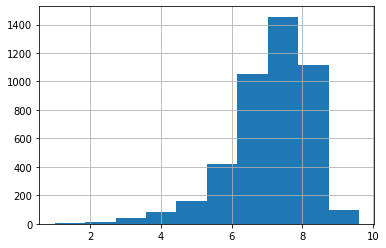

In [ ]:
df.IMDb.hist()

In [ ]:
labels=['Terrible','Bad','Fine','Goodish','Awesome']

* Equal width bins
* Equal frequency bins
* Custom-sized bins

## Equal width

In [ ]:
bins=pd.cut(df.IMDb, 5, labels=labels)

bins.cat.codes

0       4
1       4
2       4
3       4
4       4
       ..
5606   -1
5607   -1
5608   -1
5609   -1
5610   -1
Length: 5611, dtype: int8

In [ ]:
bins, representations=pd.cut(df.IMDb, 5, labels=labels, retbins=True)
bins

0       Awesome
1       Awesome
2       Awesome
3       Awesome
4       Awesome
         ...   
5606        NaN
5607        NaN
5608        NaN
5609        NaN
5610        NaN
Name: IMDb, Length: 5611, dtype: category
Categories (5, object): [Terrible < Bad < Fine < Goodish < Awesome]

In [ ]:
representations

array([0.9914, 2.72  , 4.44  , 6.16  , 7.88  , 9.6   ])

In [ ]:
bins.value_counts()

Goodish     2510
Awesome     1216
Fine         581
Bad          127
Terrible      16
Name: IMDb, dtype: int64

## Equal frequency

In [ ]:
bins=pd.qcut(df.IMDb, 5, labels=labels)

display(bins.head())

bins.cat.codes

0    Awesome
1    Awesome
2    Awesome
3    Awesome
4    Awesome
Name: IMDb, dtype: category
Categories (5, object): [Terrible < Bad < Fine < Goodish < Awesome]

0       4
1       4
2       4
3       4
4       4
       ..
5606   -1
5607   -1
5608   -1
5609   -1
5610   -1
Length: 5611, dtype: int8

In [ ]:
bins, representations=pd.qcut(df.IMDb, 5, labels=labels, retbins=True)
representations

array([1. , 6.3, 7.1, 7.5, 8. , 9.6])

In [ ]:
bins.value_counts(normalize=True).round(2)

Bad         0.23
Terrible    0.20
Awesome     0.20
Goodish     0.19
Fine        0.18
Name: IMDb, dtype: float64

## Custom-sized bins

In [ ]:
cutoffs=[0,5,7,8.5,9.3,11]

In [ ]:
bins, representations=pd.cut(df.IMDb, cutoffs, labels=labels, retbins=True)
representations

array([ 0. ,  5. ,  7. ,  8.5,  9.3, 11. ])

In [ ]:
bins.value_counts()

Fine        2447
Bad         1534
Terrible     245
Goodish      218
Awesome        6
Name: IMDb, dtype: int64

# Data Aggregations

## `aggregate()`

In [ ]:
df.aggregate('count')

Title              5611
Year               5611
Age                3165
IMDb               4450
Rotten Tomatoes    1011
Netflix            5611
Hulu               5611
Prime Video        5611
Disney+            5611
type               5611
random             5611
dtype: int64

In [ ]:
df.count()

Title              5611
Year               5611
Age                3165
IMDb               4450
Rotten Tomatoes    1011
Netflix            5611
Hulu               5611
Prime Video        5611
Disney+            5611
type               5611
random             5611
dtype: int64

In [ ]:
df.aggregate(['count','max','min','mean'])

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,random
count,5611,5611.00000,3165.0,4450.000000,1011.0,5611.000000,5611.0000,5611.000000,5611.00000,5611.0,5611
max,頭文字D First Stage,2020.00000,NaN,9.600000,NaN,1.000000,1.0000,1.000000,1.00000,1.0,to watch
min,"#MeToo, Now What?",1901.00000,NaN,1.000000,NaN,0.000000,0.0000,0.000000,0.00000,1.0,skip
mean,NaN,2011.02103,NaN,7.113258,NaN,0.344145,0.3126,0.382107,0.03208,1.0,NaN


In [ ]:
df.aggregate(['count','max','min'])

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,random
count,5611,5611,3165.0,4450.0,1011.0,5611,5611,5611,5611,5611,5611
max,頭文字D First Stage,2020,NaN,9.6,NaN,1,1,1,1,1,to watch
min,"#MeToo, Now What?",1901,NaN,1.0,NaN,0,0,0,0,1,skip


In [ ]:
df.aggregate({'Title':['shape',max],
              'Year':['median','max'],
              'type':['min','nunique']}).fillna('')

,Title,Year,type
max,頭文字D First Stage,2020,
median,,2015,
min,,,1
nunique,,,1
shape,"(5611,)",,


## `groupby()`

In [ ]:
df.groupby('Netflix').describe().stack()

Year         IMDb         Hulu  Prime Video  \
Netflix                                                             
0       count  3680.000000  2639.000000  3680.000000  3680.000000   
        mean   2009.364946     7.078931     0.444293     0.558152   
        std      12.339504     1.160068     0.496955     0.496674   
        min    1901.000000     1.700000     0.000000     0.000000   
        25%    2008.000000     6.500000     0.000000     0.000000   
        50%    2013.000000     7.300000     0.000000     1.000000   
        75%    2017.000000     7.900000     1.000000     1.000000   
        max    2020.000000     9.600000     1.000000     1.000000   
1       count  1931.000000  1811.000000  1931.000000  1931.000000   
        mean   2014.177110     7.163280     0.061626     0.046608   
        std       6.826398     1.088338     0.240537     0.210852   
        min    1914.000000     1.000000     0.000000     0.000000   
        25%    2013.000000     6.600000     0.000000     0.000000   
        50%    2016.000000     7.400000     0.000000     0.000000   
        75%    2018.000000     8.000000     0.000000     0.000000   
        max    2020.000000     9.500000     1.000000     1.000000   

                   Disney+    type  
Netflix                             
0       count  3680.000000  3680.0  
        mean      0.047283     1.0  
        std       0.212272     0.0  
        min       0.000000     1.0  
        25%       0.000000     1.0  
        50%       0.000000     1.0  
        75%       0.000000     1.0  
        max       1.000000     1.0  
1       count  1931.000000  1931.0  
        mean      0.003107     1.0  
        std       0.055670     0.0  
        min       0.000000     1.0  
        25%       0.000000     1.0  
        50%       0.000000     1.0  
        75%       0.000000     1.0  
        max       1.000000     1.0

In [ ]:
df.groupby('Netflix')['IMDb'].mean()

Netflix
0    7.078931
1    7.163280
Name: IMDb, dtype: float64

In [ ]:
df[['Netflix','IMDb']].groupby('Netflix').mean()

,IMDb
Netflix,
0,7.078931
1,7.163280


Select avg(*)  
from df[['Netflix','IMDb']]  
group by 'Netflix'  

In [ ]:
df[['Netflix','IMDb']].groupby('Netflix').agg('mean')

,IMDb
Netflix,
0,7.078931
1,7.163280


In [ ]:
df[['Netflix','IMDb']].groupby('Netflix').agg(max)

,IMDb
Netflix,
0,9.6
1,9.5


In [ ]:
df[['Netflix','IMDb']].groupby('Netflix').agg(random_index=('IMDb', lambda x: (x.mean()-x.min())/(max(x)-min(x))))

,random_index
Netflix,
0,0.680877
1,0.725092


In [ ]:
df[['Netflix','IMDb']].groupby('Netflix').agg(lambda x: (x.mean()-x.min())/(max(x)-min(x)))

,IMDb
Netflix,
0,0.680877
1,0.725092


In [ ]:
df[['Netflix','IMDb']].groupby('Netflix').agg(random_index=('IMDb', lambda x: (x.mean()-x.min())/(max(x)-min(x))),
                                              another_inex=('IMDb','mean'))

,random_index,another_inex
Netflix,,
0,0.680877,7.078931
1,0.725092,7.163280


In [ ]:
df[['Netflix','IMDb']].groupby('Netflix').agg([min,max,'mean'])

IMDb               
         min  max      mean
Netflix                    
0        1.7  9.6  7.078931
1        1.0  9.5  7.163280

In [ ]:
def quant_25(x):
    #x - Series, float is output
    return x.quantile(0.25)

df.groupby('Netflix').agg({'Year':[quant_25, 'median','max'],
                           'IMDb':['size','count','mean','median']})

Year               IMDb                       
        quant_25 median   max  size count      mean median
Netflix                                                   
0           2008   2013  2020  3680  2639  7.078931    7.3
1           2013   2016  2020  1931  1811  7.163280    7.4

## `groupby`+`filter`

In [ ]:
list(filter(lambda x: x%2==0, [1,2,3,4,5]))

[2, 4]

I want to see the series of specific age category. I will output only those age categories, that have average IMDb rating above 7.2.

In [ ]:
test=df.groupby('Age').IMDb.mean()
display(test)

display(test[test>7.2].index)

df[df.Age.isin(test[test>7.2].index)]


df[df.Age.isin(df.groupby('Age').IMDb.mean()[df.groupby('Age').IMDb.mean()>7.2].index)]


Age
13+    6.000000
16+    7.275518
18+    7.398131
7+     7.062172
all    6.874624
Name: IMDb, dtype: float64

Index(['16+', '18+'], dtype='object', name='Age')

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,random
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1,to watch
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1,to watch
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1,to watch
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1,to watch
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1,to watch
...,...,...,...,...,...,...,...,...,...,...,...
4528,Music & Murder,2016,18+,8.5,NaN,0,0,1,0,1,to watch
4609,The Worst Thing I Ever Did,2014,16+,5.4,NaN,0,0,1,0,1,to watch
4610,The Suspects: True Australian Thrillers,2010,16+,7.9,NaN,0,0,1,0,1,to watch
5516,Wicked Tuna,2012,16+,6.6,NaN,0,0,0,1,1,to watch


In [ ]:
df.groupby('Age').filter(lambda x: x.IMDb.mean()>7.2)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,random
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1,to watch
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1,to watch
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1,to watch
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1,to watch
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1,to watch
...,...,...,...,...,...,...,...,...,...,...,...
4528,Music & Murder,2016,18+,8.5,NaN,0,0,1,0,1,to watch
4609,The Worst Thing I Ever Did,2014,16+,5.4,NaN,0,0,1,0,1,to watch
4610,The Suspects: True Australian Thrillers,2010,16+,7.9,NaN,0,0,1,0,1,to watch
5516,Wicked Tuna,2012,16+,6.6,NaN,0,0,0,1,1,to watch


## `groupby`+`transform`

For every Age category, I want to calculate how far this specific series is from the average per age category in terms of IMDb rating.

1. Split by Age
2. Calculate the difference between IMDb of the series and the average IMDb per age category
3. Combine the column back

In [ ]:
test=df.groupby('Age').IMDb.agg('mean')
test

Age
13+    6.000000
16+    7.275518
18+    7.398131
7+     7.062172
all    6.874624
Name: IMDb, dtype: float64

In [ ]:
import numpy as np
def compare(x):
    if isinstance(x.Age, str):
        return x.IMDb-test[x.Age]
    else:
        return np.nan

In [ ]:
method1=df.apply(compare, axis=1)

In [ ]:
df.Age.unique()

array(['18+', '16+', '7+', nan, 'all', '13+'], dtype=object)

In [ ]:
test=df[['IMDb','Age']].groupby('Age')

new_series=pd.Series()

for i,j in test:
    print('THe Age category considered on this specific iteration is', i,'\nThe head of it is',j.head(),'\n')

THe Age category considered on this specific iteration is 13+ 
The head of it is       IMDb  Age
1116   6.6  13+
1123   6.4  13+
1514   5.7  13+
4024   5.3  13+ 

THe Age category considered on this specific iteration is 16+ 
The head of it is     IMDb  Age
1    8.8  16+
3    9.1  16+
5    8.9  16+
7    8.4  16+
11   8.7  16+ 

THe Age category considered on this specific iteration is 18+ 
The head of it is    IMDb  Age
0   9.5  18+
2   8.4  18+
4   8.7  18+
6   8.8  18+
8   8.8  18+ 

THe Age category considered on this specific iteration is 7+ 
The head of it is     IMDb Age
9    9.2  7+
16   8.5  7+
30   7.7  7+
38   7.7  7+
59   9.0  7+ 

THe Age category considered on this specific iteration is all 
The head of it is      IMDb  Age
199   8.6  all
219   8.6  all
258   7.3  all
303   9.0  all
325   9.3  all 



/home/mauritian/yes/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for i,j in test:
    new_series=new_series.append(j.IMDb.rank())
new_series.sort_index()

0       749.0
0       749.0
1       998.5
1       998.5
2       658.0
        ...  
5596    303.5
5598     37.5
5598     37.5
5601    190.5
5601    190.5
Length: 6330, dtype: float64

In [ ]:
df.loc[1]

Title              Stranger Things
Year                          2016
Age                            16+
IMDb                           8.8
Rotten Tomatoes                93%
Netflix                          1
Hulu                             0
Prime Video                      0
Disney+                          0
type                             1
random                    to watch
Name: 1, dtype: object

In [ ]:
df2=df[['IMDb','Age']].copy()

df2.Age.fillna('missing', inplace=True)

df2.Age.unique()

array(['18+', '16+', '7+', 'missing', 'all', '13+'], dtype=object)

In [ ]:
method2=df2.groupby('Age').IMDb.transform(lambda x: x-x.mean())

In [ ]:
(method1-method2).abs().sum() #so 2 methods brought you to the same output

0.0

In [ ]:
df2.groupby('Age').IMDb.transform(lambda x: x.rank())

0        749.0
1        998.5
2        658.0
3       1011.5
4        721.5
         ...  
5606       NaN
5607       NaN
5608       NaN
5609       NaN
5610       NaN
Name: IMDb, Length: 5611, dtype: float64